In [1]:
# CIVE70016 Ka Wing Chu
# CID:01726514

In [2]:
import pandas as pd
import biogeme.database as db
import biogeme.biogeme as bio
import numpy as np
from biogeme import models
from biogeme.expressions import Beta

In [3]:
# Read the data
# Make sure that this code file is in the same folder as your data file.
df = pd.read_csv('model_estimation_data.dat', sep='\t')
database = db.Database('model_estimation_data', df)

In [4]:
# The following statement allows you to use the names of the variable as Python variable.
globals().update(database.variables)

## Part 1

In [5]:
# Task 1.1
# Model 1
# Parameters to be estimated
ASC_Bus    = Beta('ASC_Bus',0,None,None,0)
ASC_Bike   = Beta('ASC_Bike',0,None,None,1)
ASC_Car    = Beta('ASC_Car',0,None,None,0)

# Note that in above case, the parameter ASC_Bike is not estimated (as specified by the 1 in the fifth argument on 
# the corresponding line), and its value is fixed to 0. Read: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf

# Similarly now, declare parameters for travel time, "Beta_TT" and travel cost, "Beta_TC" below:
Beta_TT    = Beta('Beta_TT',0,None,None,0)
Beta_Cost  = Beta('Beta_Cost',0,None,None,0)

# Definition of new variables
tot_cost_car = car_Cost + car_PCost

# Similarly now, define new variables for total time for car and total time for bus
tot_time_car = car_TT+car_PT
tot_time_bus = bus_IVT+bus_TA+bus_WT

# Definition of the utility functions (provided for V1-Bus, define yourself for Bike and Car)
V1    =  ASC_Bus   +  Beta_TT * tot_time_bus  + Beta_Cost * bus_Cost
V2    =  ASC_Bike   +  Beta_TT * BS_TT + Beta_Cost * BS_Cost
V3    =  ASC_Car   +  Beta_TT * tot_time_car + Beta_Cost * tot_cost_car

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
Bus_AV = 1
Bike_AV = 1
Car_AV = 1

av = {1: Bus_AV, 2: Bike_AV, 3: Car_AV}# Definition of the model. This is the contribution of each observation to the log likelihood function.
logprob = models.loglogit(V, av, Choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'Model_1'  

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Command added to avoid any problem with the reported initial loglikelihood. 
# When True, the current iterate is saved after each iteration, in a file named __[modelName].iter
# If such a file exists, the starting values for the estimation are replaced by the values saved in the file.  
biogeme.saveIterations = False 

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()

# Use print command with above "pandasResults" as argument to get succint results. 
print(pandasResults)

# However, go to directory folder to access detailed results

              Value   Std err     t-test       p-value  Rob. Std err  \
ASC_Bus    3.877669  0.323599  11.982962  0.000000e+00      0.327207   
ASC_Car    1.013999  0.357000   2.840334  4.506628e-03      0.356375   
Beta_Cost -0.431034  0.070965  -6.073909  1.248338e-09      0.070175   
Beta_TT   -0.344430  0.020693 -16.645110  0.000000e+00      0.019443   

           Rob. t-test  Rob. p-value  
ASC_Bus      11.850809  0.000000e+00  
ASC_Car       2.845311  4.436811e-03  
Beta_Cost    -6.142252  8.135967e-10  
Beta_TT     -17.714589  0.000000e+00  


In [6]:
#Task 1.2
# Model 2
# Parameters to be estimated
ASC_Bus    = Beta('ASC_Bus',0,None,None,0)
ASC_Bike   = Beta('ASC_Bike',0,None,None,1)
ASC_Car    = Beta('ASC_Car',0,None,None,0)

# Note that in above case, the parameter ASC_Bike is not estimated (as specified by the 1 in the fifth argument on 
# the corresponding line), and its value is fixed to 0. Read: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf

# Similarly now, declare parameters for travel time, "Beta_TT" and travel cost, "Beta_TC" below:
Beta_TTbus    = Beta('Beta_TTbus',0,None,None,0)
Beta_TTbike    = Beta('Beta_TTbike',0,None,None,0)
Beta_TTcar    = Beta('Beta_TTcar',0,None,None,0)
Beta_Costbus  = Beta('Beta_Costbus',0,None,None,0)
Beta_Costbike  = Beta('Beta_Costbike',0,None,None,0)
Beta_Costcar  = Beta('Beta_Costcar',0,None,None,0)

# Definition of new variables
tot_cost_car = car_Cost + car_PCost

# Similarly now, define new variables for total time for car and total time for bus
tot_time_car = car_TT+car_PT
tot_time_bus = bus_IVT+bus_TA+bus_WT

# Definition of the utility functions (provided for V1-Bus, define yourself for Bike and Car)
V1    =  ASC_Bus   +  Beta_TTbus * tot_time_bus  + Beta_Costbus * bus_Cost
V2    =  ASC_Bike   +  Beta_TTbike * BS_TT + Beta_Costbike * BS_Cost
V3    =  ASC_Car   +  Beta_TTcar * tot_time_car + Beta_Costcar * tot_cost_car

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
Bus_AV = 1
Bike_AV = 1
Car_AV = 1

av = {1: Bus_AV, 2: Bike_AV, 3: Car_AV}# Definition of the model. This is the contribution of each observation to the log likelihood function.
logprob = models.loglogit(V, av, Choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'Model_2'  

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Command added to avoid any problem with the reported initial loglikelihood. 
# When True, the current iterate is saved after each iteration, in a file named __[modelName].iter
# If such a file exists, the starting values for the estimation are replaced by the values saved in the file.  
biogeme.saveIterations = False 

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()

# Use print command with above "pandasResults" as argument to get succint results. 
print(pandasResults)

# However, go to directory folder to access detailed results

                  Value   Std err     t-test       p-value  Rob. Std err  \
ASC_Bus        1.714306  1.622267   1.056734  2.906328e-01      1.511253   
ASC_Car       -0.046517  1.522876  -0.030546  9.756319e-01      1.454001   
Beta_Costbike -0.364518  0.161903  -2.251453  2.435685e-02      0.151321   
Beta_Costbus  -0.047767  0.145061  -0.329289  7.419372e-01      0.151529   
Beta_Costcar  -0.608619  0.101119  -6.018863  1.756467e-09      0.108854   
Beta_TTbike   -0.390735  0.033469 -11.674556  0.000000e+00      0.030240   
Beta_TTbus    -0.379726  0.026423 -14.371144  0.000000e+00      0.024837   
Beta_TTcar    -0.334005  0.021809 -15.314959  0.000000e+00      0.021675   

               Rob. t-test  Rob. p-value  
ASC_Bus           1.134360  2.566434e-01  
ASC_Car          -0.031993  9.744780e-01  
Beta_Costbike    -2.408907  1.600039e-02  
Beta_Costbus     -0.315234  7.525840e-01  
Beta_Costcar     -5.591133  2.255931e-08  
Beta_TTbike     -12.921004  0.000000e+00  
Beta_TTbus    

In [7]:
# Task 1.3
# Model 3
# Parameters to be estimated
ASC_Bus    = Beta('ASC_Bus',0,None,None,0)
ASC_Bike   = Beta('ASC_Bike',0,None,None,1)
ASC_Car    = Beta('ASC_Car',0,None,None,0)

# Note that in above case, the parameter ASC_Bike is not estimated (as specified by the 1 in the fifth argument on 
# the corresponding line), and its value is fixed to 0. Read: https://transp-or.epfl.ch/documents/technicalReports/Bier20.pdf

# Similarly now, declare parameters for travel time below:
Beta_IVTbus    = Beta('Beta_IVTbus',0,None,None,0)
Beta_ATbus    = Beta('Beta_ATbus',0,None,None,0)
Beta_WTbus    = Beta('Beta_WT',0,None,None,0)
Beta_TTbike  =Beta('Beta_TTbike',0,None,None,0)
Beta_TTcar  =Beta('Beta_TTcar',0,None,None,0)
Beta_PTcar  =Beta('Beta_PTcar',0,None,None,0)
Beta_Costbus  = Beta('Beta_Costbus',0,None,None,0)
Beta_Costbike  = Beta('Beta_Costbike',0,None,None,0)
Beta_TCcar  = Beta('Beta_TCcar',0,None,None,0)
Beta_PCcar  = Beta('Beta_PCcar',0,None,None,0)

# Definition of new variables
tot_cost_car = car_Cost + car_PCost

# Definition of the utility functions (provided for V1-Bus, define yourself for Bike and Car)
V1    =  ASC_Bus   +  Beta_IVTbus * bus_IVT  + Beta_ATbus * bus_TA + Beta_WTbus * bus_WT + Beta_Costbus * bus_Cost
V2    =  ASC_Bike   +  Beta_TTbike * BS_TT + Beta_Costbike * BS_Cost
V3    =  ASC_Car   +  Beta_TTcar * car_TT +  Beta_PTcar * car_PT + Beta_TCcar * car_Cost + Beta_PCcar * car_PCost

# Associate utility functions with the numbering of alternatives
V = {1: V1, 2: V2, 3: V3}

# Associate the availability conditions with the alternatives
Bus_AV = 1
Bike_AV = 1
Car_AV = 1

av = {1: Bus_AV, 2: Bike_AV, 3: Car_AV}# Definition of the model. This is the contribution of each observation to the log likelihood function.
logprob = models.loglogit(V, av, Choice)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'Model_3'  

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Command added to avoid any problem with the reported initial loglikelihood. 
# When True, the current iterate is saved after each iteration, in a file named __[modelName].iter
# If such a file exists, the starting values for the estimation are replaced by the values saved in the file.  
biogeme.saveIterations = False 

# Estimate the parameters
results = biogeme.estimate()

# Get the results in a pandas table
pandasResults = results.getEstimatedParameters()

# Use print command with above "pandasResults" as argument to get succint results. 
print(pandasResults)

# However, go to directory folder to access detailed results

                  Value   Std err     t-test       p-value  Rob. Std err  \
ASC_Bus       -2.721378  1.948336  -1.396771  1.624825e-01      1.807699   
ASC_Car       -0.041925  1.662275  -0.025222  9.798782e-01      1.648369   
Beta_ATbus    -0.035395  0.063868  -0.554180  5.794555e-01      0.064349   
Beta_Costbike -0.482563  0.182630  -2.642304  8.234400e-03      0.171955   
Beta_Costbus  -0.162786  0.159423  -1.021099  3.072076e-01      0.159804   
Beta_IVTbus   -0.478033  0.035210 -13.576558  0.000000e+00      0.031949   
Beta_PCcar    -1.042329  0.155856  -6.687774  2.265899e-11      0.167897   
Beta_PTcar    -0.546035  0.069368  -7.871610  3.552714e-15      0.064012   
Beta_TCcar    -0.257370  0.142748  -1.802963  7.139406e-02      0.153938   
Beta_TTbike   -0.460691  0.040059 -11.500353  0.000000e+00      0.033477   
Beta_TTcar    -0.380804  0.026577 -14.328349  0.000000e+00      0.025747   
Beta_WT       -0.210006  0.065775  -3.192776  1.409123e-03      0.065942   

           

In [18]:
## Task 1.4
import statistics

# Observed Market Share
choice=df.iloc[:,11]
V1size=len(df.loc[df["Choice"]==1])
V2size=len(df.loc[df["Choice"]==2])
V3size=len(df.loc[df["Choice"]==3])

V1obms=V1size/(V1size+V2size+V3size)
V2obms=V2size/(V1size+V2size+V3size)
V3obms=V3size/(V1size+V2size+V3size)

print("P1_ms = " + str(V1obms))
print("P2_ms = " + str(V2obms))
print("P3_ms = " + str(V3obms))

# Sample enumeration approach
# Obtain Beta Values
betaval = pandasResults['Value']
p1=[]
p2=[]
p3=[]

a=list(range(0,1000))

for x in a:
    V1_se    =  betaval[0]   +  betaval[5] * df.iloc[x,1] + betaval[2] * df.iloc[x,2] + betaval[11] * df.iloc[x,3] + betaval[4] * df.iloc[x,4]
    V2_se    =  0  +  betaval[9] * df.iloc[x,5]         + betaval[3] * df.iloc[x,6]
    V3_se    =  betaval[1]   +  betaval[10] * df.iloc[x,7]  + betaval[7] * df.iloc[x,8] + betaval[8] * df.iloc[x,9] + betaval[6] * df.iloc[x,10]

    P1_se = np.exp(V1_se)/(np.exp(V1_se) + np.exp(V2_se) + np.exp(V3_se))
    p1.append(P1_se)
    P2_se = np.exp(V2_se)/(np.exp(V1_se) + np.exp(V2_se) + np.exp(V3_se))
    p2.append(P2_se)
    P3_se = np.exp(V3_se)/(np.exp(V1_se) + np.exp(V2_se) + np.exp(V3_se))
    p3.append(P3_se)

P1_avg = statistics.mean(p1)
P2_avg = statistics.mean(p2)
P3_avg = statistics.mean(p3)

print("P1_se = " + str(P1_avg))
print("P2_se = " + str(P2_avg))
print("P3_se = " + str(P3_avg))

diffP1_1 = V1obms - P1_avg
diffP2_1 = V2obms - P2_avg
diffP3_1 = V3obms - P3_avg

print("difference for bus = " + str(diffP1_1))
print("difference for bike = " + str(diffP2_1))
print("difference for car = " + str(diffP3_1))

# Average individual approach
# Bus Averages
busIVT_avg = statistics.mean(df['bus_IVT'])
busAT_avg = statistics.mean(df['bus_TA'])
busWT_avg = statistics.mean(df['bus_WT'])
busTC_avg = statistics.mean(df['bus_Cost'])

# BS Averages
bikeTT_avg = statistics.mean(df['BS_TT'])
bikeTC_avg = statistics.mean(df['BS_Cost'])

# Car Averages
carTT_avg = statistics.mean(df['car_TT'])
carPT_avg = statistics.mean(df['car_PT'])
carTC_avg = statistics.mean(df['car_Cost'])
carPC_avg = statistics.mean(df['car_PCost'])

# Check values for Report
print(busIVT_avg)
print(busAT_avg)
print(busWT_avg)
print(busTC_avg)
print(bikeTT_avg)
print(bikeTC_avg)
print(carTT_avg)
print(carPT_avg)
print(carTC_avg)
print(carPT_avg)

# Obtain Beta Values
betaval = pandasResults['Value']

# Utility Function
V1_ai    =  betaval[0]   +  betaval[5] * busIVT_avg + betaval[2] * busAT_avg + betaval[11] * busWT_avg + betaval[4] * busTC_avg
V2_ai    =  0  +  betaval[9] * bikeTT_avg        + betaval[3] * bikeTC_avg
V3_ai    =  betaval[1]   +  betaval[10] * carTT_avg  + betaval[7] * carPT_avg + betaval[8] * carTC_avg + betaval[6] * carPT_avg


print(V1_ai)
print(V2_ai)
print(V3_ai)

# Market Share
P1_ai = np.exp(V1_ai)/(np.exp(V1_ai) + np.exp(V2_ai) + np.exp(V3_ai))
P2_ai = np.exp(V2_ai)/(np.exp(V1_ai) + np.exp(V2_ai) + np.exp(V3_ai))
P3_ai = np.exp(V3_ai)/(np.exp(V1_ai) + np.exp(V2_ai) + np.exp(V3_ai))

print("P1_ai = " + str(P1_ai))
print("P2_ai = " + str(P2_ai))
print("P3_ai = " + str(P3_ai))

diffP1_2 = P1_ai - P1_avg
diffP2_2 = P2_ai - P2_avg
diffP3_2 = P3_ai - P3_avg

print("difference for bus = " + str(diffP1_2))
print("difference for bike = " + str(diffP2_2))
print("difference for car = " + str(diffP3_2))

P1_ms = 0.265
P2_ms = 0.139
P3_ms = 0.596
P1_se = 0.2650016882051158
P2_se = 0.13900044973835593
P3_se = 0.5959978620565283
difference for bus = -1.688205115812913e-06
difference for bike = -4.4973835591766154e-07
difference for car = 2.137943471702819e-06
35.33
7.365
12.55
4.938
50.31
2.506
29.96
4.919
3.1
4.919
-23.31037753141515
-24.38666757235178
-20.061829967982355
P1_ai = 0.03690885936837741
P2_ai = 0.012580670799890607
P3_ai = 0.950510469831732
difference for bus = -0.22809282883673843
difference for bike = -0.12641977893846532
difference for car = 0.35451260777520377


## Part 2

In [160]:
# Task 2.1
# Defining Parameters
it_b = 25
at_b = 5
wt_b = 7.5
c_b = 5
t_c = 25
pt_c = 2
c_c = 3
pc_c = 5
t_bs = 35
c_bs = 2.5

# Utility Function
V1_4b   =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_b + betaval[4] * c_b
V2_4b    =  0  +  betaval[9] * t_bs         + betaval[3] * c_bs
V3_4b    =  betaval[1]   +  betaval[10] * t_c  + betaval[7] * pt_c + betaval[8] * c_c + betaval[6] * pc_c

# Market Share
P1_4b = np.exp(V1_4b)/(np.exp(V1_4b) + np.exp(V2_4b) + np.exp(V3_4b))
P2_4b = np.exp(V2_4b)/(np.exp(V1_4b) + np.exp(V2_4b) + np.exp(V3_4b))
P3_4b = np.exp(V3_4b)/(np.exp(V1_4b) + np.exp(V2_4b) + np.exp(V3_4b))

print("V1_4b = " + str (V1_4b))
print("V2_4b = " + str (V2_4b))
print("V3_4b = " + str (V3_4b))
print("P1_4b = " + str(P1_4b))
print("P2_4b = " + str(P2_4b))
print("P3_4b = " + str(P3_4b))

# Average wait time
wt_6b = 5

# Utility Function
V1_6b    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_6b + betaval[4] * c_b

# Market Share
P1_6b = np.exp(V1_6b)/(np.exp(V1_6b) + np.exp(V2_4b) + np.exp(V3_4b))
P2_6b = np.exp(V2_4b)/(np.exp(V1_6b) + np.exp(V2_4b) + np.exp(V3_4b))
P3_6b = np.exp(V3_4b)/(np.exp(V1_6b) + np.exp(V2_4b) + np.exp(V3_4b))

print("V1_6b = " + str (V1_6b))
print("P1_6b = " + str(P1_6b))
print("P2_6b = " + str(P2_6b))
print("P3_6b = " + str(P3_6b))

print(np.exp(V3_4b))
print(np.exp(V2_4b))

V1_4b = -17.238151198811078
V2_4b = -17.33059302666347
V3_4b = -16.637855880121485
P1_4b = 0.26778355755964073
P2_4b = 0.2441388706278476
P3_4b = 0.4880775718125117
V1_6b = -16.713136034110168
P1_6b = 0.3820438851458471
P2_6b = 0.20604168280522303
P3_6b = 0.41191443204892986
5.946631137503718e-08
2.9745349792639947e-08


[0.27829454564035566, 0.3049828307863936, 0.33204182178676966, 0.3591172483474245, 0.38585398146616423, 0.41191443204892986, 0.4369950533693367, 0.4608393012342455, 0.48324601811342116, 0.5040729324298561, 0.5232356366913334]
[0.13920433963440879, 0.15255395488173787, 0.16608899907282512, 0.17963226441431204, 0.19300611358268716, 0.20604168280522303, 0.21858713647372507, 0.23051414988491595, 0.2417221030245067, 0.25213983092991965, 0.26172511254652636]


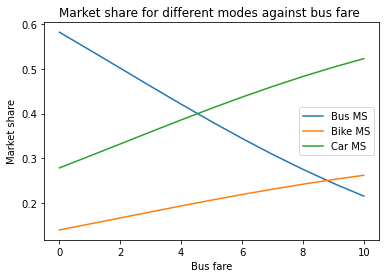

In [161]:
#Task 2.1

import matplotlib.pyplot as plt

p1_it = []
p2_it = []
p3_it = [] 
v1_it = []

c_b2 = list(range(11))

for x in c_b2:
    # Utility Function
    V1_it6b    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_6b + betaval[4] * x
    v1_it.append(V1_it6b)
    
    # Market Share
    P1_it = np.exp(V1_it6b)/(np.exp(V1_it6b) + np.exp(V2_4b) + np.exp(V3_4b))
    p1_it.append(P1_it)
    P2_it = np.exp(V2_4b)/(np.exp(V1_it6b) + np.exp(V2_4b) + np.exp(V3_4b))
    p2_it.append(P2_it)
    P3_it = np.exp(V3_4b)/(np.exp(V1_it6b) + np.exp(V2_4b) + np.exp(V3_4b))
    p3_it.append(P3_it)

plt.plot(c_b2,p1_it,label = 'Bus MS')
plt.plot(c_b2,p2_it,label = 'Bike MS')
plt.plot(c_b2,p3_it,label = 'Car MS')

plt.legend()
plt.title('Market share for different modes against bus fare ')
plt.xlabel('Bus fare')
plt.ylabel('Market share')

print(p3_it)
print(p2_it)

## Part 3

In [162]:
# Task 3.1
alpha_n = -1 *betaval[4]

# Baseline Utility
print("V1_4b = " + str(V1_4b))
print("V2_4b = " + str(V2_4b))
print("V3_4b = " + str(V3_4b))

# Baseline expected consumer surplus
CS_base = 1/alpha_n * np.log(np.exp(V1_4b) + np.exp(V2_4b) + np.exp(V3_4b))
print(CS_base)
print(CS_base*1000)
print("-----")

diff_4it = []
diff_6it = []
cs4b=[]
cs6b=[]

for x in c_b2:
    V1_4it    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_b + betaval[4] * x
    CS_4 = 1/alpha_n * np.log(np.exp(V1_4it) + np.exp(V2_4b) + np.exp(V3_4b))
    diff_4it.append((CS_4-CS_base)*1000)
    cs4b.append(CS_4)
    print(V1_4it)
    
print("-----")

print(cs4b)

print("-----")

print(diff_4it)

print("-----")
for x in c_b2:
    V1_6it    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_6b + betaval[4] * x
    CS_6 = 1/alpha_n * np.log(np.exp(V1_6it) + np.exp(V2_4b) + np.exp(V3_4b))
    cs6b.append(CS_6)
    diff_6it.append((CS_6-CS_base)*1000)
    print((V1_6it))

print(cs6b)
print("-----")
print(diff_6it)

V1_4b = -17.238151198811078
V2_4b = -17.33059302666347
V3_4b = -16.637855880121485
-97.80049759270668
-97800.49759270667
-----
-16.42422001518388
-16.58700625190932
-16.74979248863476
-16.9125787253602
-17.075364962085636
-17.238151198811078
-17.400937435536516
-17.563723672261958
-17.726509908987396
-17.889296145712834
-18.052082382438275
-----
[-96.0185017443385, -96.45062116167885, -96.8433375056169, -97.19799913140568, -97.51635959443803, -97.80049759270668, -98.05272964823857, -98.2755225129925, -98.47141118113156, -98.64292679558673, -98.7925369994304]
-----
[1781.995848368183, 1349.8764310278234, 957.1600870897754, 602.4984613009963, 284.1379982686476, 0.0, -252.23205553189132, -475.02492028581855, -670.9135884248809, -842.4292028800551, -992.0394067237197]
-----
-15.89920485048297
-16.06199108720841
-16.22477732393385
-16.387563560659288
-16.550349797384726
-16.713136034110168
-16.875922270835606
-17.038708507561047
-17.201494744286485
-17.364280981011923
-17.527067217737365
[-

In [455]:
#Task 3.2 
#for 4 buses per hour

#calculate the market share of car for different bus fares without congestion

#initialise the market share of cars, bike and buses for different bar share without congestion
p1_it_32 = []
p2_it_32 = []
p3_it_32 = [] 


for x in c_b2:
    # Utility Function
    V1_it4b    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_b + betaval[4] * x
    
    # Market Share
    P1_it = np.exp(V1_it4b)/(np.exp(V1_it4b) + np.exp(V2_4b) + np.exp(V3_4b))
    p1_it_32.append(P1_it)
    P2_it = np.exp(V2_4b)/(np.exp(V1_it4b) + np.exp(V2_4b) + np.exp(V3_4b))
    p2_it_32.append(P2_it)
    P3_it = np.exp(V3_4b)/(np.exp(V1_it4b) + np.exp(V2_4b) + np.exp(V3_4b))
    p3_it_32.append(P3_it)

print(p1_it_32)
print(p3_it_32)

x_4b=[]
tc_4b=[]
vflow4b_car=[]
P34b=[]
CS4b_2=[]
aggdiffCS4b_2=[]
vflow4b_bus=[]

for a in c_bit:
    #intialise the vflow
    vflow4b=[]
    vflow4b.append(p3_it[a]*1000)

    # intialise travel time and difference between tc and travel time of car and consumer surplus
    ttc4b=[]
    ttc4b.append(0)
    CS_diff_4b=[]
    diff4b=[]
    P3_4b=[]
    CS_4b_2=[]


    # Utility Function of bus and bike
    V1_4b_32    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_b + betaval[4] * c_bit[a]
    V2_4b_32    =  0  +  betaval[9] * t_bs         + betaval[3] * c_bs

    #tolerence
    tol=1e-5

    #weighted combination parameter
    lam=1/8

    for x in it_a:
    
            ttc4b_new=tf*(1+0.15*(vflow4b[x]/K)**4)*60
            ttc4b.append(ttc4b_new) 
    
            V3_it4b_32    =  betaval[1]   +  betaval[10] * ttc4b[x+1] + betaval[7] * pt_c + betaval[8] * c_c + betaval[6] * pc_c
    
            # Market Share
            P1_4b = np.exp(V1_4b_32)/(np.exp(V1_4b_32) + np.exp(V2_4b_32) + np.exp(V3_it4b_32))
            P2_4b = np.exp(V2_4b_32)/(np.exp(V1_4b_32) + np.exp(V2_4b_32) + np.exp(V3_it4b_32))
            P3_4b_new = np.exp(V3_it4b_32)/(np.exp(V1_4b_32) + np.exp(V2_4b_32) + np.exp(V3_it4b_32))
            P3_4b.append(P3_4b_new)
    
            #vflow for next iteration
            vflow4b_new=lam*(P3_4b_new*1000)+(1-lam)*vflow4b[x]
            vflow4b.append(vflow4b_new)
    
            #calculate the difference of the travel time in the two iterations
            diff4b.append(abs(ttc4b_new-ttc4b[x]))

    
            #Change in consumer surplus
            CS_4b_2_new = 1/alpha_n * np.log(np.exp(V1_4b_32) + np.exp(V2_4b_32) + np.exp(V3_it4b_32))
            CS_4b_2.append(CS_4b_2_new)
            CS_diff_4b.append((CS_4b_2_new-CS_base)*1000)
    
            #break the for loop if the value converges
            if diff4b[x]<tol:
                break

       
    x_4b.append(x+1)
    tc_4b.append(ttc4b[-1])
    vflow4b_car.append(vflow4b[-2])
    vflow4b_bus.append(P1_4b*1000)
    P34b.append(vflow4b[-2]/1000)
    CS4b_2.append(CS_4b_2[-1])
    aggdiffCS4b_2.append(CS_diff_4b[-1])     


diffCS4b_con=[]
aggdiffCS4b_con=[]

for x in c_bit:
    diffCS4b_con.append(CS4b_2[x]-CS4b_2[5])
    aggdiffCS4b_con.append(diffCS4b_con[x]*1000)
    
print(x_4b)
print(tc_4b)
print(P34b)
print(vflow4b_car)
print(vflow4b_bus)
print(CS4b_2)
print(aggdiffCS4b_2)
print(diffCS4b_con)
print(aggdiffCS4b_con)

[0.4521553514926294, 0.41223050696148467, 0.3734280149044615, 0.3361888479237995, 0.30088000008354654, 0.26778355755964073, 0.23709305555364585, 0.20891638054840994, 0.1832838091605161, 0.1601594635191858, 0.13945447602168284]
[0.3651798433845413, 0.3917927682579681, 0.4176575604229007, 0.4424802783280952, 0.4660162927064828, 0.4880775718125117, 0.5085351098143479, 0.5273169922212374, 0.5444030373810784, 0.5598171606050226, 0.5736185988635096]
[7, 9, 10, 11, 12, 11, 15, 15, 14, 17, 18]
[26.532571766382425, 26.795485171650995, 27.045947780103067, 27.2830339513494, 27.505981328239457, 27.714209735567568, 27.907366342333273, 28.08530700329154, 28.248110164887116, 28.39607876858341, 28.52969901174631]
[0.242952140309056, 0.24536058546814027, 0.24759081934117816, 0.24964781286889098, 0.2515368117620074, 0.25326346397477445, 0.25483416180610635, 0.25625586306586196, 0.2575362070640918, 0.25868354748453964, 0.2597066729399602]
[242.95214030905598, 245.36058546814027, 247.59081934117816, 249.6

In [456]:
#Task 3.2 (Continue)

#for 6 buses per hour
it_a=list(range(100))

tf=1/3
K=200

x_6b=[]
tc_6b=[]
vflow6b_car=[]
vflow6b_bus=[]
P36b=[]
CS6b_2=[]
aggdiffCS6b_2=[]
c_bit=list(range(11))

for a in c_bit:
    #intialise the vflow
    vflow6b_a=[]
    vflow6b_a.append(p3_it[a]*1000)

    # intialise travel time and difference between tc and travel time of car and consumer surplus
    ttc6b_a=[]
    ttc6b_a.append(0)
    CS_diff_6b=[]
    diff6b_a=[]
    P3_6b=[]
    CS_6b_2=[]


    # Utility Function of bus and bike
    V1_6b_32a    =  betaval[0]   +  betaval[5] * it_b + betaval[2] * at_b + betaval[11] * wt_6b + betaval[4] * c_bit[a]
    V2_4b_32a    =  0  +  betaval[9] * t_bs         + betaval[3] * c_bs

    #tolerence
    tol=1e-4

    #weighted combination parameter
    lam=1/8

    for x in it_a:
    
            ttc6b_a_new=tf*(1+0.15*(vflow6b_a[x]/K)**4)*60
            ttc6b_a.append(ttc6b_a_new) 
    
            V3_it6b_32a    =  betaval[1]   +  betaval[10] * ttc6b_a[x+1] + betaval[7] * pt_c + betaval[8] * c_c + betaval[6] * pc_c
    
            # Market Share
            P1_6b = np.exp(V1_6b_32a)/(np.exp(V1_6b_32a) + np.exp(V2_4b_32a) + np.exp(V3_it6b_32a))
            P2_6b = np.exp(V2_4b_32a)/(np.exp(V1_6b_32a) + np.exp(V2_4b_32a) + np.exp(V3_it6b_32a))
            P3_6b_new = np.exp(V3_it6b_32a)/(np.exp(V1_6b_32a) + np.exp(V2_4b_32a) + np.exp(V3_it6b_32a))
            P3_6b.append(P3_6b_new)
    
            #vflow for next iteration
            vflow6b_new=lam*(P3_6b_new*1000)+(1-lam)*vflow6b_a[x]
            vflow6b_a.append(vflow6b_new)
    
            #calculate the difference of the travel time in the two iterations
            diff6b_a.append(abs(ttc6b_a_new-ttc6b_a[x]))

    
            #Change in consumer surplus
            CS_6b_2_new = 1/alpha_n * np.log(np.exp(V1_6b_32a) + np.exp(V2_4b_32a) + np.exp(V3_it6b_32a))
            CS_6b_2.append(CS_6b_2_new)
            CS_diff_6b.append((CS_6b_2_new-CS_base)*1000)
    
            #break the for loop if the value converges
            if diff6b_a[x]<tol:
                break
                 
    #print(x+1)
    #print(diff6b_a)
    #print(vflow6b_a[:x+1])
    #print(ttc6b_a[1::])
    #print(CS_6b_2)
    #print(CS_diff_6b)
    #print('----')
       
    x_6b.append(x+1)
    tc_6b.append(ttc6b_a[-1])
    vflow6b_car.append(vflow6b_a[-2])
    vflow6b_bus.append(P1_6b*1000)
    P36b.append(vflow6b_a[-2]/1000)
    CS6b_2.append(CS_6b_2[-1])
    aggdiffCS6b_2.append(CS_diff_6b[-1])     

diffCS6b_con=[]
aggdiffCS6b_con=[]

for x in c_bit:
    diffCS6b_con.append(CS6b_2[x]-CS4b_2[5])
    aggdiffCS6b_con.append(diffCS6b_con[x]*1000)
    
print(x_6b)
print(tc_6b)
print(P36b)
print(vflow6b_car)
print(vflow6b_bus)
print(CS6b_2)
print(aggdiffCS6b_2)
print(diffCS6b_con)
print(aggdiffCS6b_con)

[7, 7, 7, 8, 9, 10, 11, 11, 13, 14, 15]
[25.612988352581088, 25.90837727051131, 26.195046331789197, 26.471761913847576, 26.737333298514535, 26.990674173408568, 27.230867252143142, 27.457053489309537, 27.668620512610257, 27.86520535328096, 28.04655691607641]
[0.2339096920836743, 0.23692818999728188, 0.23975121771873098, 0.24238476277354834, 0.24483397867410178, 0.24710381311667565, 0.2491995645691637, 0.25112589441799227, 0.2528884495041427, 0.2544937953334079, 0.2559482732107718]
[233.9096920836743, 236.9281899972819, 239.75121771873097, 242.38476277354835, 244.8339786741018, 247.10381311667564, 249.1995645691637, 251.12589441799227, 252.88844950414267, 254.49379533340786, 255.9482732107718]
[618.3250112485084, 595.5800949755159, 571.2114981387276, 545.2643859903076, 517.8419746970726, 489.1108955297768, 459.30207958223815, 428.6990267316502, 397.6347775053226, 366.4753870971485, 335.59601512700095]
[-94.71601597923595, -95.4857855370943, -96.22915241900898, -96.94357083294068, -97.626

## Part 4

In [457]:
#Task 4.1

#define parameters
Cop4=2000
Cop6=2500
ec=1
eb=8
MC=1.6

#baseline scenario (without congestion)
c_base=5
pi_base=c_base*p1_it_32[c_base]*1000-Cop4
E_base=ec*p3_it_32[c_base]*1000+eb*4

#baseline scenario (congestion)
pi_base_con=c_base*vflow4b_bus[c_base]-Cop4
E_base_con=ec*vflow4b_car[c_base]+eb*4

#capacity of buses for a frequency of 4 buses
capacity_4b=100*4

#initialise pi, E and W for a frequency of 4 buses
pi4b=[]
E4b=[]
W4b=[]
W4b_con=[]

#for a frequency of 4 buses per hour
for b in c_bit:
    pi_4b=c_bit[b]*vflow4b_bus[b]-Cop4
    pi4b.append(pi_4b)
    
    E_4b=ec*vflow4b_car[b]+eb*4
    E4b.append(E_4b)
    
    if vflow4b_bus[b]<capacity_4b:
        print('When bus fare is '+str(b)+', Capacity of 4 buses OK')
    else:
        print('When bus fare is '+str(b)+', Capacity of 4 buses not OK')
    
    changepi=pi_4b-pi_base
    W_4b=aggdiffCS4b_2[b]+MC*(pi_4b-pi_base)-(E_4b-E_base) #uncongested basleline scenario
    W4b.append(W_4b)
    
    W_4b_con=aggdiffCS4b_con[b]+MC*(pi_4b-pi_base_con)-(E_4b-E_base_con) #congested basleline scenario
    W4b_con.append(W_4b_con)

print(pi4b)
print(E4b)
print(W4b)
print(W4b_con)
print('------------------------')

#capacity of buses for a frequency of 6 buses
capacity_6b=100*6

#initialise pi, E and W for a frequency of 4 buses
pi6b=[]
E6b=[]
W6b=[]
W6b_con=[]

#for a frequency of 6 buses per hour
for b in c_bit:
    pi_6b=c_bit[b]*vflow6b_bus[b]-Cop6
    pi6b.append(pi_6b)
    
    E_6b=ec*vflow6b_car[b]+eb*6
    E6b.append(E_6b)
    
    if vflow6b_bus[b]<capacity_6b:
        print('When bus fare is '+str(b)+', Capacity of 6 buses OK')
    else:
        print('When bus fare is '+str(b)+', Capacity of 6 buses not OK')
    
    changepi=pi_6b-pi_base
    W_6b=aggdiffCS6b_2[b]+MC*(pi_6b-pi_base)-(E_6b-E_base) #use uncongested basleline scenario
    W6b.append(W_6b)
    
    W_6b_con=aggdiffCS6b_con[b]+MC*(pi_6b-pi_base_con)-(E_6b-E_base_con) #use congested basleline scenario
    W6b_con.append(W_6b_con)

print(pi6b)
print(E6b)
print(W6b)
print(W6b_con)
print('------------------------')


When bus fare is 0, Capacity of 4 buses not OK
When bus fare is 1, Capacity of 4 buses not OK
When bus fare is 2, Capacity of 4 buses not OK
When bus fare is 3, Capacity of 4 buses not OK
When bus fare is 4, Capacity of 4 buses not OK
When bus fare is 5, Capacity of 4 buses OK
When bus fare is 6, Capacity of 4 buses OK
When bus fare is 7, Capacity of 4 buses OK
When bus fare is 8, Capacity of 4 buses OK
When bus fare is 9, Capacity of 4 buses OK
When bus fare is 10, Capacity of 4 buses OK
[-2000.0, -1488.520725591216, -1035.0328835390847, -642.5949829642559, -313.0748056774946, -46.93317132157608, 156.90266489306123, 301.04010794426085, 389.50798639081495, 427.5354705740806, 421.24151491257544]
[274.95214030905595, 277.36058546814024, 279.5908193411782, 281.647812868891, 283.53681176200735, 285.2634639747744, 286.83416180610635, 288.25586306586194, 289.5362070640918, 290.68354748453964, 291.7066729399602]
[-1196.83987763693, -1056.508625516174, -974.6499854028415, -954.2456329625791, -